# Map of GLM Flash count on HRRR grid
Using the HRRR 3km grid, count the number of flashes from the GLM

In [292]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, pluck_hrrr_point
from BB_GOES.get_GLM import get_GLM_files_for_range, accumulate_GLM
from BB_maps.my_basemap import draw_HRRR_map, draw_centermap
from mpl_toolkits.basemap import Basemap

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

First, get the HRRR lat/lon grid

In [2]:
LL = get_hrrr_latlon()
lat = LL['lat']
lon = LL['lon']

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
m = draw_HRRR_map()

Open a GLM file

In [4]:
sDATE = datetime(2018, 5, 8, 0, 0)
eDATE = datetime(2018, 9, 7, 0, 0)
GLM = accumulate_GLM(get_GLM_files_for_range(sDATE, eDATE))

Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/00/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/01/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/02/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/03/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/04/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/05/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/06/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/07/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/08/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180522/09/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM

Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180612/23/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/18/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/19/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/20/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/21/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/22/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180616/23/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180726/23/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180731/13/
Missing: /uufs/chpc.utah.edu/common/home/horel-group7/Pando/GOES16/GLM-L2-LCFA//20180731/14/


Text(1,1,'Start: 2018-05-08 00:00:00\n End: 2018-09-07 00:00:00')

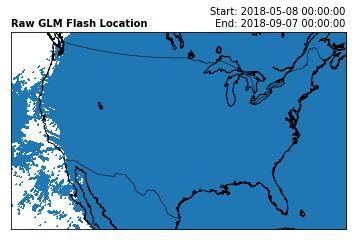

In [11]:
m.scatter(GLM['longitude'], GLM['latitude'], marker='+', latlon=True, s=1)
m.drawcountries()
m.drawcoastlines()
plt.title('Raw GLM Flash Location', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE, eDATE), loc='right')

In [50]:
mm = draw_centermap(lat=40, lon=-115, size=(10,10))

In [214]:
H, y, x = np.histogram2d(GLM['longitude'], GLM['latitude'], bins=(800, 895))
Y, X, = np.meshgrid(y,x)
H = np.transpose(H)

In [332]:
masked = H
masked = np.ma.array(masked)
masked[masked == 0] = np.ma.masked

In [340]:
B = Basemap(resolution='i', area_thresh=10000,
            llcrnrlon=y.min(), llcrnrlat=x.min(),
            urcrnrlon=y.max(), urcrnrlat=x.max())

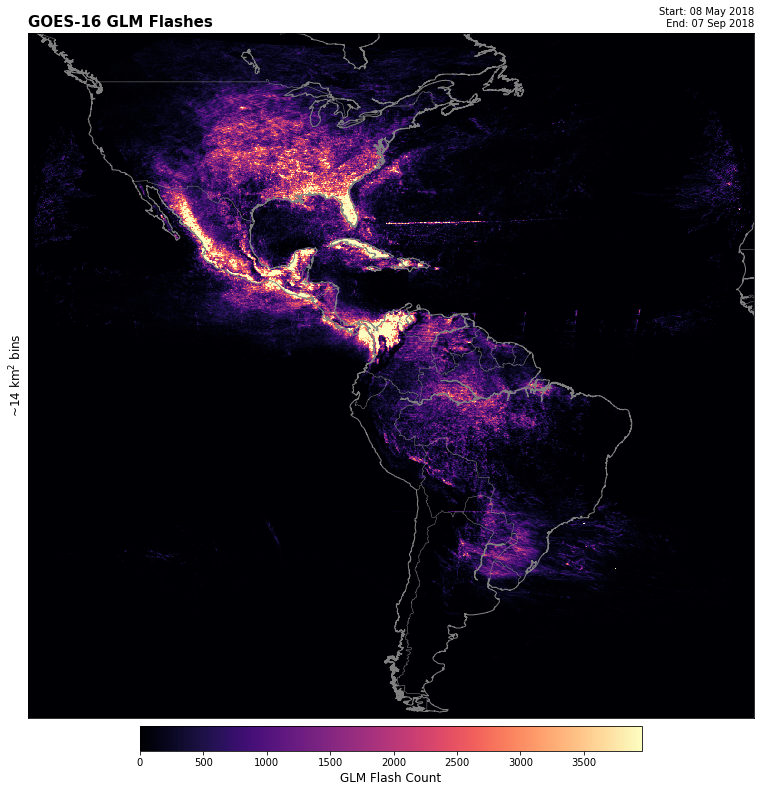

In [341]:
B.pcolormesh(Y, X, H, latlon=True, cmap='magma', vmin=0, vmax=np.percentile(H, 99.5))
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.6)
cb.set_label('GLM Flash Count')

B.drawcoastlines(color='grey')
B.drawcountries(color='grey')

plt.title('GOES-16 GLM Flashes', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10)
plt.ylabel(r'~14 km$\mathregular{^{2}}$ bins')

plt.savefig('GLM_field-of-view')

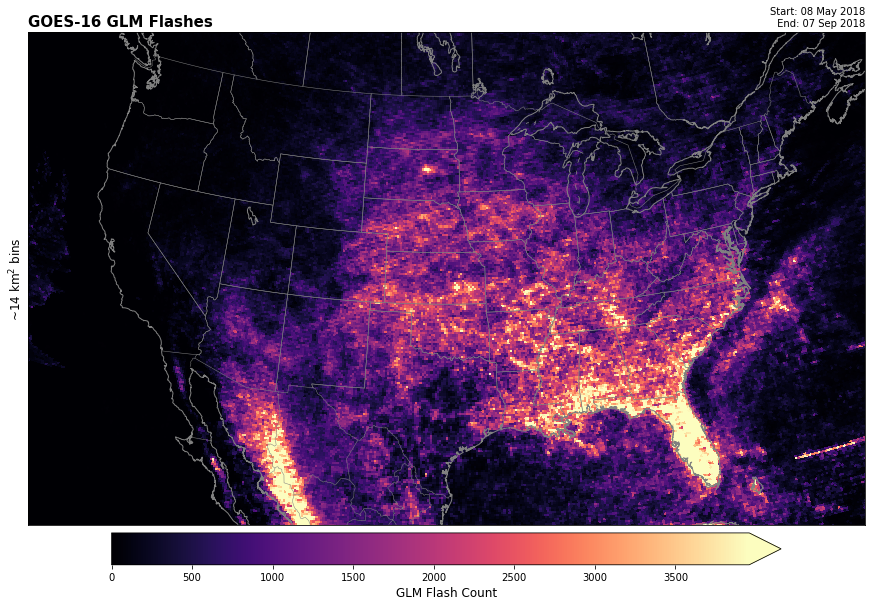

In [322]:
m.pcolormesh(Y, X, H, latlon=True, vmin=0, vmax=np.percentile(H, 99.5), cmap='magma')
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.8, extend='max')
cb.set_label('GLM Flash Count')

m.drawcoastlines(color='grey')
m.drawcountries(color='grey')
m.drawstates(color='grey')

plt.title('GOES-16 GLM Flashes', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10)
plt.ylabel(r'~14 km$\mathregular{^{2}}$ bins')

plt.savefig('GLM_CONUS')

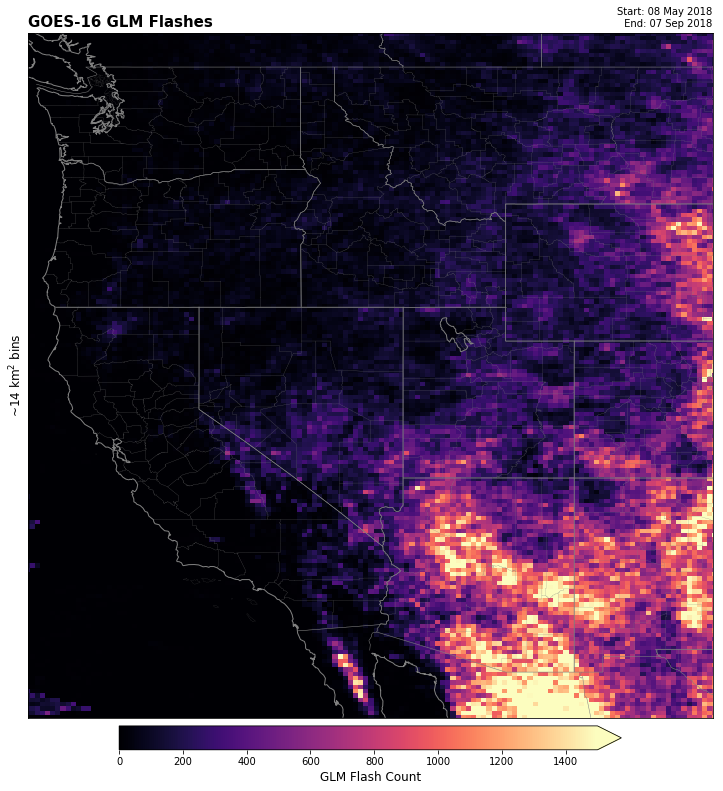

In [295]:
mm.pcolormesh(Y, X, H, latlon=True, vmin=0, vmax=1500, cmap='magma')
cb = plt.colorbar(orientation='horizontal', pad=.01, shrink=.6, extend='max')
cb.set_label('GLM Flash Count')

mm.drawcoastlines(color='grey')
mm.drawcountries(color='grey')
mm.drawstates(color='grey')
mm.drawcounties(color='grey')

plt.title('GOES-16 GLM Flashes', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10)
plt.ylabel(r'~14 km$\mathregular{^{2}}$ bins')

plt.savefig('GLM_West')

In [219]:
from metpy.calc import lat_lon_grid_deltas

In [244]:
yy = np.linspace(y.min(), y.max(), 800+1)
xx = np.linspace(x.min(), x.max(), 895+1)

YY, XX = np.meshgrid(yy, xx)
y_m, x_m = lat_lon_grid_deltas(YY,XX)

In [245]:
np.mean(y_m/1000), np.mean(x_m/1000)

(<Quantity(14.080278369604642, 'meter')>,
 <Quantity(14.049489670304858, 'meter')>)

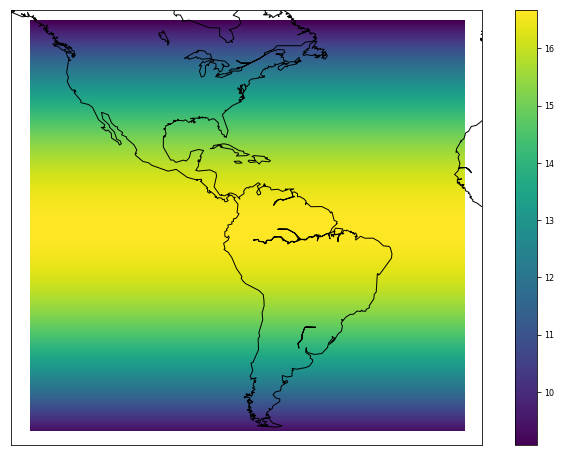

In [247]:
B.pcolormesh(YY, XX, np.round(y_m/1000, 2), latlon=True)
plt.colorbar()

B.drawcoastlines()

In [248]:
print(np.round(x_m/1000, 2))

[[14.05 14.05 14.05 ... 14.05 14.05 14.05] [14.05 14.05 14.05 ... 14.05 14.05 14.05] [14.05 14.05 14.05 ... 14.05 14.05 14.05] ... [14.05 14.05 14.05 ... 14.05 14.05 14.05] [14.05 14.05 14.05 ... 14.05 14.05 14.05] [14.05 14.05 14.05 ... 14.05 14.05 14.05]] meter


In [309]:
np.sort(H.flatten())[-2000]

4982.0

In [314]:
np.percentile(H, 99.9)

6940.0050000002375

## GLM Field-of-view

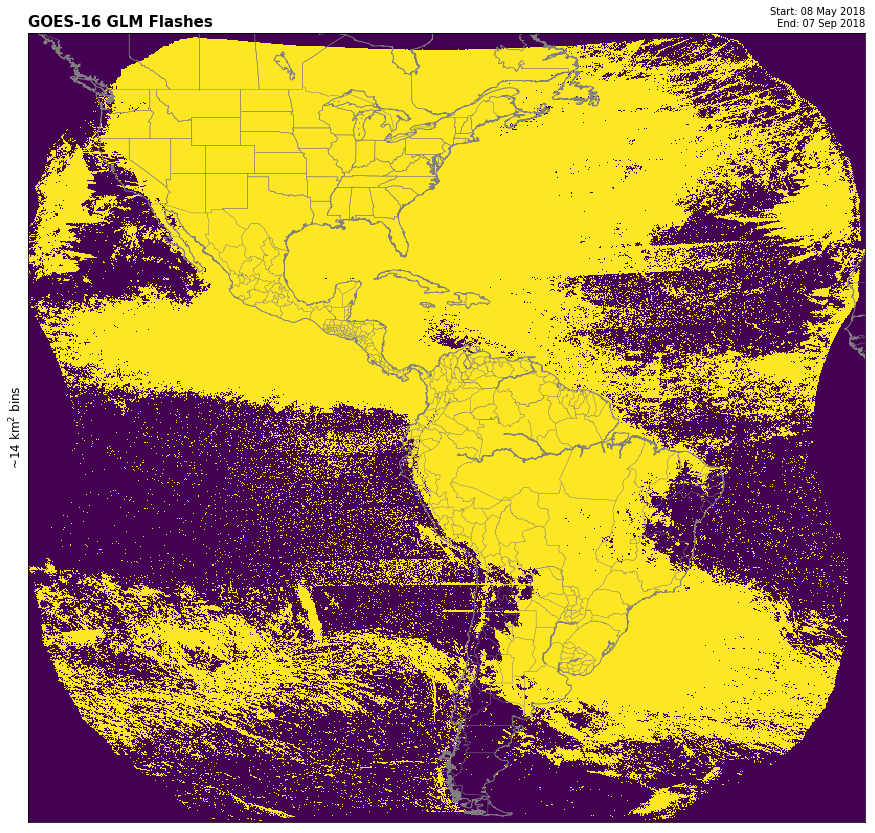

In [344]:
B.pcolormesh(Y, X, H>0, latlon=True)
cb.set_label('GLM Flash Count')

B.drawcoastlines(color='grey')
B.drawcountries(color='grey')
B.drawstates(color='grey')

plt.title('GOES-16 GLM Flashes', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE.strftime('%d %b %Y'), eDATE.strftime('%d %b %Y')), loc='right', fontsize=10)
plt.ylabel(r'~14 km$\mathregular{^{2}}$ bins')

plt.savefig('GLM_field-of-view_MASK')

In [ ]:
np.save('aggregated_GLM_flashes_8aggregated_GLM_flahses', GLM)

{'latitude': masked_array(data=[ 23.42010117,  21.87652588,   8.15592384, ...,
                    -31.25198936,   0.92494625,  20.64232254],
              mask=False,
        fill_value=1e+20),
 'longitude': masked_array(data=[-105.36949921, -103.09596252,  -75.1701889 , ...,
                     -37.31835938,  -62.61793137,  -89.28798676],
              mask=False,
        fill_value=1e+20),
 'energy': masked_array(data=[2.59414902e-14, 6.10387993e-15, 6.04284092e-13, ...,
                    1.98376099e-14, 7.62984999e-13, 1.80064459e-13],
              mask=False,
        fill_value=1e+20),
 'number of values each 20 seconds': array([185., 188., 174., ..., 380., 361., 358.]),
 'DATETIME': [datetime.datetime(2018, 5, 8, 0, 0),
  datetime.datetime(2018, 9, 7, 0, 0)]}